In [1]:
#Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...


In [3]:
#reading the csv
data = pd.read_csv(r"FlipKart.csv")
data

,Unnamed: 0,Product_name,Review,Rating
0,0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5
...,...,...,...,...
2299,2299,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,"Great display, accurate colours at this price ...",5
2300,2300,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Superb monitor first brought 1 used for 2 mont...,5
2301,2301,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Awesome,5
2302,2302,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Only one issue with adapter,5


In [5]:
# Drop the unnecessary column
data = data.drop(columns=['Unnamed: 0'])

In [13]:
print(data.head())

                                        Product_name  \
0  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
1  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
2  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
3  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
4  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   

                                              Review  Rating  
0  Best under 60k Great performanceI got it for a...       5  
1                                 Good perfomence...       5  
2  Great performance but usually it has also that...       5  
3           My wife is so happy and best product 👌🏻😘       5  
4  Light weight laptop with new amazing features,...       5  


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,2304.0,4.259549,1.180017,1.0,4.0,5.0,5.0,5.0


In [11]:
data['Rating'].value_counts(
)

Rating
5    1382
4     552
1     184
3     140
2      46
Name: count, dtype: int64

In [9]:
# check for null values
data.isnull().sum()

Product_name    0
Review          0
Rating          0
dtype: int64

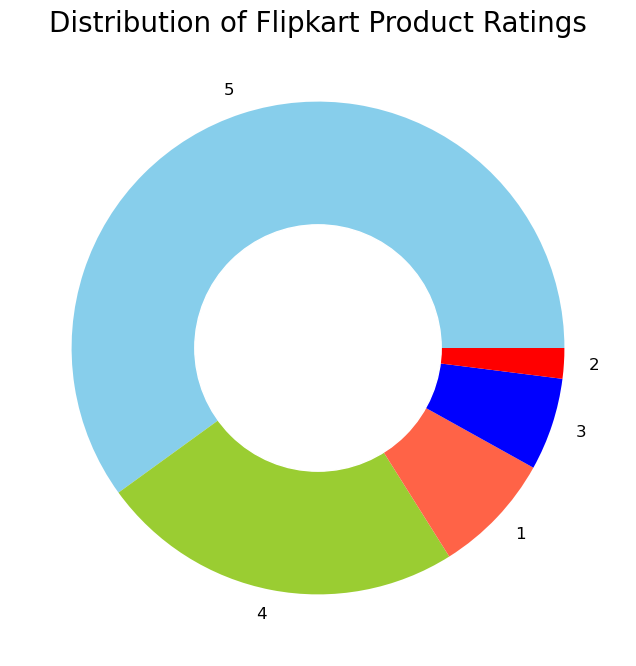

In [12]:
# distribution visulisation of the product ratings
ratings = data["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Flipkart Product Ratings", fontsize=20)
plt.show()

In [15]:
# adding three more columns to this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the customer reviews mentioned in the Review column of the dataset
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]
print(data.head())

                                        Product_name  \
0  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
1  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
2  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
3  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
4  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   

                                              Review  Rating  Positive  \
0  Best under 60k Great performanceI got it for a...       5     0.314   
1                                 Good perfomence...       5     0.744   
2  Great performance but usually it has also that...       5     0.119   
3           My wife is so happy and best product 👌🏻😘       5     0.568   
4  Light weight laptop with new amazing features,...       5     0.467   

   Negative  Neutral  
0     0.073    0.613  
1     0.000    0.256  
2     0.000    0.881  
3     0.000    0.432  
4     0.000    0.533  


In [16]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


Most of the people are neutral when submitting their experience with the products they have purchased for FlipKart.

In [17]:
# Total number of the sentiment analysis
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  835.669999999999
Negative:  104.91700000000004
Neutral:  1363.413000000003


most of the reviews of flipkart are seen to be neutral, while positive reviews are more than the negative reviews.